In [1]:
import numpy as np
import matplotlib.pyplot as plt
from model import *
import pandas as pd


In [2]:
# model = MoneyModel(5, 10, 10)
# for i in range(20):
#     model.step()

Allowed debt = 0 - 200
Fan = 0 - 100  -> Revenue = 0 - 200
Max budget = 400 --  RATIO 1.5475


Max salary by a player at init = 10 x 10 / 18 * 10 = 55.56
11 X 55.56 = 611

4.78

Number of fans on social media:

Manchester United – 209,4M     
Chelsea – 137,2M                
Liverpool – 134,7M              
Manchester City – 132,9M        
Arsenal – 97,8M               
Tottenham – 89,3M                
Aston Villa – 14,1M
West Ham – 13,9M
Everton FC – 13,3M
Newcastle United – 11M
Wolverhampton – 9,9M
Crystal Palace – 5,8M
Brighton – 5,7M
Sheffield United – 4,05M
Fulham – 3,5M
Nottingham Forest – 3,36M
Bournemouth – 3,3M
Brentford – 3,24M
Burnley – 3M
Luton – 1M

In [3]:
# empty_model = MyModel(4, 2, 50)
# # empty_model = MyModel(98, 10, 1200, 10, 10, (0, 96))

# # empty_model.FFP = True


# for i in range(120):
#     empty_model.step()



In [4]:
params={
        "C": 98,
        "F": 1,
        "P": 2000,
#         "width": 10,
#         "height": 10,
        "league_range": [(0, 97)],
        "FFP": [False, True], 
    }


results = mesa.batch_run(
    model_cls=MyModel,
    parameters = params,
    iterations=50,
    max_steps=80,
    data_collection_period = 1,  # Collect data at each time step
    display_progress=True,
)

results_df = pd.DataFrame(results)


100%|█████████████████████████████████████████| 100/100 [19:29<00:00, 11.69s/it]


In [5]:
print(results_df.keys())
print(results_df.head())
print(results_df.tail())
print(len(results_df))

Index(['RunId', 'iteration', 'Step', 'C', 'F', 'P', 'league_range', 'FFP',
       'Winner Club', 'Season', 'Average revenue by league',
       'Total revenue by league', 'AgentID', 'Club Revenue', 'Team size',
       'Name', 'TV', 'Type'],
      dtype='object')
   RunId  iteration  Step   C  F     P league_range    FFP Winner Club  \
0      0          0     0  98  1  2000      (0, 97)  False        None   
1      0          0     1  98  1  2000      (0, 97)  False        None   
2      0          0     1  98  1  2000      (0, 97)  False        None   
3      0          0     1  98  1  2000      (0, 97)  False        None   
4      0          0     1  98  1  2000      (0, 97)  False        None   

   Season                          Average revenue by league  \
0       0  {'Premier League': 308.8, 'La Liga': 160.97, '...   
1       0  {'Premier League': 308.8, 'La Liga': 160.97, '...   
2       0  {'Premier League': 308.8, 'La Liga': 160.97, '...   
3       0  {'Premier League': 308.8, 

{'Bundesliga': 29.5}
{'Bundesliga': 29.5, 'La Liga': 19.5}
{'Bundesliga': 29.5, 'La Liga': 19.5, 'Ligue 1': 23.5}
{'Bundesliga': 29.5, 'La Liga': 19.5, 'Ligue 1': 23.5, 'Premier League': 31.75}
{'Bundesliga': 29.5, 'La Liga': 19.5, 'Ligue 1': 23.5, 'Premier League': 31.75, 'Serie A': 34.75}


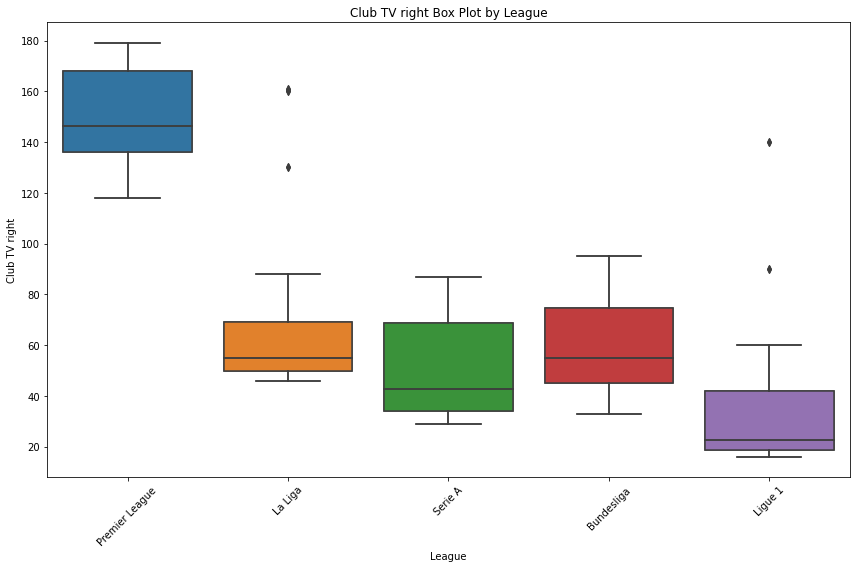

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'agent_id' column exists in results_df
club_df = results_df[['TV', 'Name', 'AgentID']].dropna()
club_df = club_df.head(98)

# Map league names based on agent_id ranges
def map_agent_to_league(agent_id):
    if 0 <= agent_id <= 19:
        return 'Premier League'
    elif 20 <= agent_id <= 39:
        return 'La Liga'
    elif 40 <= agent_id <= 59:
        return 'Serie A'
    elif 60 <= agent_id <= 77:
        return 'Bundesliga'
    elif 78 <= agent_id <= 97:
        return 'Ligue 1'
    else:
        return 'Unknown'

# Assign league names to the rows based on agent_id
club_df['League Name'] = club_df['AgentID'].apply(map_agent_to_league)

# Create a figure and axis
plt.figure(figsize=(12, 8))

ax = sns.boxplot(x='League Name', y='TV', data=club_df)


# Create a box plot for each league using Seaborn
sns.boxplot(x='League Name', y='TV', data=club_df)

# Set labels and title
plt.xlabel('League')
plt.ylabel('Club TV right')
plt.title('Club TV right Box Plot by League')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Calculate the IQR for each league
grouped_data = club_df.groupby('League Name')
iqr_by_league = {}
for league, data in grouped_data:
    iqr = data['TV'].quantile(0.75) - data['TV'].quantile(0.25)
    iqr_by_league[league] = iqr
    print(iqr_by_league)


    
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()



Season 0, Average Revenue = {'Premier League': 308.8, 'La Liga': 160.97, 'Serie A': 130.7, 'Bundesliga': 168.83, 'Ligue 1': 98.1}


In [7]:
winners_df = results_df[['Winner Club', 'Season', "Team size"]].set_index('Season')
winners_df = winners_df.drop(0)
winners_df = winners_df[~winners_df.index.duplicated(keep='first')]
print(winners_df)


              Winner Club  Team size
Season                              
1               Liverpool       26.0
2                     PSG       19.0
3       Manchester United       12.0
4           Bayern Munich       11.0
5       Manchester United       11.0
6           Bayern Munich       11.0
7               Liverpool       11.0
8             Inter Milan       10.0
9                 Chelsea       11.0
10      Manchester United       11.0
11              Liverpool       11.0
12      Manchester United       11.0
13      Manchester United       27.0
14              Liverpool       17.0
15                    PSG       28.0
16      Manchester United       25.0
17      Manchester United       11.0
18      Manchester United       16.0
19      Manchester United       11.0
20          Bayern Munich       14.0


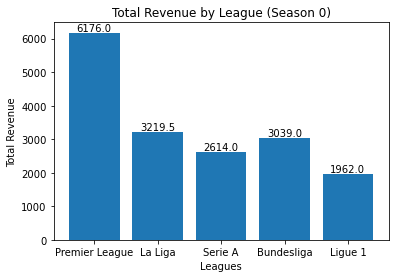

In [8]:

# Group the data by 'Season' and 'league_range'
grouped_data = results_df.groupby(['Season', 'league_range'])

# Initialize a dictionary to store total revenue for each league
total_revenue_by_league = {}

# Iterate through the grouped data to calculate total revenue for each league in the first season
for group, data in grouped_data:
    season, league_range = group
    if season == 0:  # Check if it's the first season (season number starts from 0)
        total_revenue = data['Total revenue by league'].iloc[0]  # The total revenue is the same for all clubs in the same league and step
        for league, revenue in total_revenue.items():
            total_revenue_by_league[league] = total_revenue_by_league.get(league, 0) + revenue

# Extracting league names and revenue values
leagues = list(total_revenue_by_league.keys())
revenues = list(total_revenue_by_league.values())

# Plotting the histogram for the first season
plt.bar(leagues, revenues)
plt.xlabel('Leagues')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by League (Season 0)')

# Adding the total revenue numbers on top of each bar
for i, revenue in enumerate(revenues):
    plt.text(i, revenue, str(revenue), ha='center', va='bottom')
    
plt.show()


{'Bundesliga': 88.5}
{'Bundesliga': 88.5, 'La Liga': 50.375}
{'Bundesliga': 88.5, 'La Liga': 50.375, 'Ligue 1': 47.75}
{'Bundesliga': 88.5, 'La Liga': 50.375, 'Ligue 1': 47.75, 'Premier League': 301.75}
{'Bundesliga': 88.5, 'La Liga': 50.375, 'Ligue 1': 47.75, 'Premier League': 301.75, 'Serie A': 96.625}


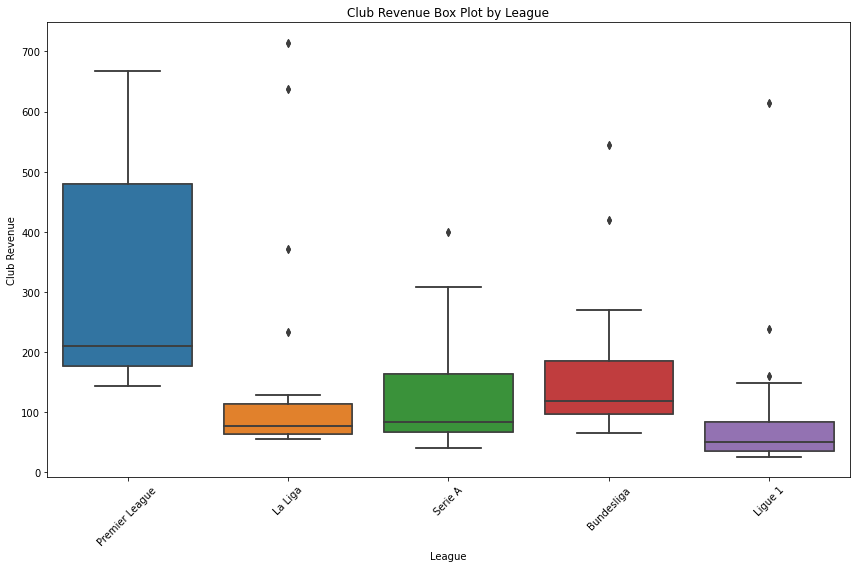

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'agent_id' column exists in results_df
club_df = results_df[['Club Revenue', 'Name', 'AgentID']].dropna()
club_df = club_df.head(98)

# Map league names based on agent_id ranges
def map_agent_to_league(agent_id):
    if 0 <= agent_id <= 19:
        return 'Premier League'
    elif 20 <= agent_id <= 39:
        return 'La Liga'
    elif 40 <= agent_id <= 59:
        return 'Serie A'
    elif 60 <= agent_id <= 77:
        return 'Bundesliga'
    elif 78 <= agent_id <= 97:
        return 'Ligue 1'
    else:
        return 'Unknown'

# Assign league names to the rows based on agent_id
club_df['League Name'] = club_df['AgentID'].apply(map_agent_to_league)

# Create a figure and axis
plt.figure(figsize=(12, 8))

ax = sns.boxplot(x='League Name', y='Club Revenue', data=club_df)


# Create a box plot for each league using Seaborn
sns.boxplot(x='League Name', y='Club Revenue', data=club_df)

# Set labels and title
plt.xlabel('League')
plt.ylabel('Club Revenue')
plt.title('Club Revenue Box Plot by League')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Calculate the IQR for each league
grouped_data = club_df.groupby('League Name')
iqr_by_league = {}
for league, data in grouped_data:
    iqr = data['Club Revenue'].quantile(0.75) - data['Club Revenue'].quantile(0.25)
    iqr_by_league[league] = iqr
    print(iqr_by_league)


    
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

